In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, GlobalAveragePooling2D,BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D

In [6]:
# Dataset path
train_path = 'HAM10000/train_dir'
test_path = 'HAM10000/test_dir'


In [7]:
# Data Generation
data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
print("Training set")
train_data = data_gen.flow_from_directory(train_path,
                                          target_size = (224, 224),
                                          batch_size = 16,
                                          class_mode = 'categorical',
                                          shuffle = True)
print("Testing set")
test_data = data_gen.flow_from_directory(test_path,
                                         target_size = (224, 224),
                                         batch_size = 16,
                                         class_mode = 'categorical',
                                         shuffle = False)

Training set
Found 6372 images belonging to 7 classes.
Testing set
Found 1525 images belonging to 7 classes.


In [11]:
base_model = ResNet50(input_shape=(224, 224, 3))

In [12]:
output = base_model.output
output =GlobalAveragePooling2D()(output)
output = Dense(7, activation='softmax')(output)
model = Model(inputs=base_model.input, outputs=output)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

                                                                                                  
 activation_8 (Activation)      (None, 55, 55, 64)   0           ['bn2c_branch2b[0][0]']          
                                                                                                  
 res2c_branch2c (Conv2D)        (None, 55, 55, 256)  16640       ['activation_8[0][0]']           
                                                                                                  
 bn2c_branch2c (BatchNormalizat  (None, 55, 55, 256)  1024       ['res2c_branch2c[0][0]']         
 ion)                                                                                             
                                                                                                  
 add_2 (Add)                    (None, 55, 55, 256)  0           ['bn2c_branch2c[0][0]',          
                                                                  'activation_6[0][0]']           
          

 ion)                                                                                             
                                                                                                  
 add_5 (Add)                    (None, 28, 28, 512)  0           ['bn3c_branch2c[0][0]',          
                                                                  'activation_15[0][0]']          
                                                                                                  
 activation_18 (Activation)     (None, 28, 28, 512)  0           ['add_5[0][0]']                  
                                                                                                  
 res3d_branch2a (Conv2D)        (None, 28, 28, 128)  65664       ['activation_18[0][0]']          
                                                                                                  
 bn3d_branch2a (BatchNormalizat  (None, 28, 28, 128)  512        ['res3d_branch2a[0][0]']         
 ion)     

 add_8 (Add)                    (None, 14, 14, 1024  0           ['bn4b_branch2c[0][0]',          
                                )                                 'activation_24[0][0]']          
                                                                                                  
 activation_27 (Activation)     (None, 14, 14, 1024  0           ['add_8[0][0]']                  
                                )                                                                 
                                                                                                  
 res4c_branch2a (Conv2D)        (None, 14, 14, 256)  262400      ['activation_27[0][0]']          
                                                                                                  
 bn4c_branch2a (BatchNormalizat  (None, 14, 14, 256)  1024       ['res4c_branch2a[0][0]']         
 ion)                                                                                             
          

                                                                                                  
 res4f_branch2a (Conv2D)        (None, 14, 14, 256)  262400      ['activation_36[0][0]']          
                                                                                                  
 bn4f_branch2a (BatchNormalizat  (None, 14, 14, 256)  1024       ['res4f_branch2a[0][0]']         
 ion)                                                                                             
                                                                                                  
 activation_37 (Activation)     (None, 14, 14, 256)  0           ['bn4f_branch2a[0][0]']          
                                                                                                  
 res4f_branch2b (Conv2D)        (None, 14, 14, 256)  590080      ['activation_37[0][0]']          
                                                                                                  
 bn4f_bran

 ion)                                                                                             
                                                                                                  
 activation_46 (Activation)     (None, 7, 7, 512)    0           ['bn5c_branch2a[0][0]']          
                                                                                                  
 res5c_branch2b (Conv2D)        (None, 7, 7, 512)    2359808     ['activation_46[0][0]']          
                                                                                                  
 bn5c_branch2b (BatchNormalizat  (None, 7, 7, 512)   2048        ['res5c_branch2b[0][0]']         
 ion)                                                                                             
                                                                                                  
 activation_47 (Activation)     (None, 7, 7, 512)    0           ['bn5c_branch2b[0][0]']          
          

In [14]:
from keras import optimizers
adam = tf.keras.optimizers.Adam(learning_rate=0.001,epsilon=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [10]:
class_weights = {   
                    0: 1.0,  # akiec
                    1: 1.0,  # bcc
                    2: 1.0,  # bkl
                    3: 1.0,  # df
                    4: 5.0,  # mel
                    5: 1.0,  # nv
                    6: 1.0,  # vasc
                }


In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint=  ModelCheckpoint(filepath ='resnet_50.hdf5',monitor='val_accuracy',save_best_only=True,save_weights_only=True)
Earlystop = EarlyStopping(monitor='val_loss', mode='min',patience=65, min_delta=0.001)
history = model.fit(train_data,
                    steps_per_epoch=350,
                    epochs=100,
                    verbose=2,
                    validation_data=test_data,validation_steps=50,callbacks=[checkpoint,Earlystop],class_weight=class_weights)

Epoch 1/100
350/350 - 46s - loss: 2.3204 - accuracy: 0.2955 - val_loss: 2.0193 - val_accuracy: 0.3850 - 46s/epoch - 133ms/step
Epoch 2/100
350/350 - 37s - loss: 2.1534 - accuracy: 0.3493 - val_loss: 1.2145 - val_accuracy: 0.6087 - 37s/epoch - 105ms/step
Epoch 3/100
350/350 - 36s - loss: 2.0539 - accuracy: 0.3683 - val_loss: 1.2199 - val_accuracy: 0.5437 - 36s/epoch - 103ms/step
Epoch 4/100
350/350 - 36s - loss: 1.8952 - accuracy: 0.4052 - val_loss: 1.6722 - val_accuracy: 0.3537 - 36s/epoch - 103ms/step
Epoch 5/100
350/350 - 36s - loss: 1.8843 - accuracy: 0.4223 - val_loss: 1.0331 - val_accuracy: 0.6500 - 36s/epoch - 103ms/step
Epoch 6/100
350/350 - 36s - loss: 1.8355 - accuracy: 0.4572 - val_loss: 0.8398 - val_accuracy: 0.6925 - 36s/epoch - 103ms/step
Epoch 7/100
350/350 - 36s - loss: 1.6920 - accuracy: 0.4764 - val_loss: 0.9763 - val_accuracy: 0.6137 - 36s/epoch - 102ms/step
Epoch 8/100
350/350 - 36s - loss: 1.6852 - accuracy: 0.4830 - val_loss: 1.0138 - val_accuracy: 0.6637 - 36s/epo

350/350 - 36s - loss: 0.0669 - accuracy: 0.9796 - val_loss: 0.2123 - val_accuracy: 0.9425 - 36s/epoch - 102ms/step
Epoch 66/100
350/350 - 36s - loss: 0.0738 - accuracy: 0.9778 - val_loss: 0.2605 - val_accuracy: 0.9312 - 36s/epoch - 103ms/step
Epoch 67/100
350/350 - 36s - loss: 0.0376 - accuracy: 0.9891 - val_loss: 0.3121 - val_accuracy: 0.9250 - 36s/epoch - 103ms/step
Epoch 68/100
350/350 - 36s - loss: 0.0503 - accuracy: 0.9868 - val_loss: 1.1839 - val_accuracy: 0.8325 - 36s/epoch - 102ms/step
Epoch 69/100
350/350 - 36s - loss: 0.0859 - accuracy: 0.9773 - val_loss: 0.8013 - val_accuracy: 0.8175 - 36s/epoch - 102ms/step
Epoch 70/100
350/350 - 36s - loss: 0.1212 - accuracy: 0.9755 - val_loss: 1.6303 - val_accuracy: 0.7775 - 36s/epoch - 102ms/step
Epoch 71/100
350/350 - 36s - loss: 0.2158 - accuracy: 0.9491 - val_loss: 0.8048 - val_accuracy: 0.8350 - 36s/epoch - 103ms/step
Epoch 72/100
350/350 - 36s - loss: 0.0850 - accuracy: 0.9796 - val_loss: 0.4674 - val_accuracy: 0.8800 - 36s/epoch - 

In [15]:
from tensorflow.keras import models
model.load_weights("resnet_50.hdf5")

In [16]:
predictions = model.predict(test_data, steps=1525/16, verbose=0)

In [17]:
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
#geting predictions on test dataset
y_pred = np.argmax(predictions, axis=1)

targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
#getting the true labels per image 
y_true = test_data.classes

#getting the predicted labels per image 
y_prob=predictions
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_true)

# Creating classification report 
report = classification_report(y_true, y_pred, target_names=targetnames)

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

       akiec       0.95      0.93      0.94        40
         bcc       0.96      1.00      0.98        48
         bkl       0.77      0.98      0.86       124
          df       0.69      1.00      0.81        11
         mel       0.84      0.98      0.91        63
          nv       1.00      0.95      0.98      1222
        vasc       0.94      1.00      0.97        17

    accuracy                           0.96      1525
   macro avg       0.88      0.98      0.92      1525
weighted avg       0.97      0.96      0.96      1525



In [18]:
from sklearn.metrics import roc_auc_score
print("Precision: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("weighted Roc score: " + str(roc_auc_score(y_true,y_prob,multi_class='ovr',average='weighted')))

Precision: 0.9668453755338989
Recall: 0.959344262295082
Accuracy: 0.959344262295082
weighted Roc score: 0.9959815159163128


In [19]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(7):
    r = roc_auc_score(y_test[:, i], y_prob[:, i])
    print("The ROC AUC score of "+targetnames[i]+" is: "+str(r))

The ROC AUC score of akiec is: 0.9981313131313131
The ROC AUC score of bcc is: 1.0
The ROC AUC score of bkl is: 0.9972369966153208
The ROC AUC score of df is: 1.0
The ROC AUC score of mel is: 0.9925412025275226
The ROC AUC score of nv is: 0.9957111914137404
The ROC AUC score of vasc is: 1.0


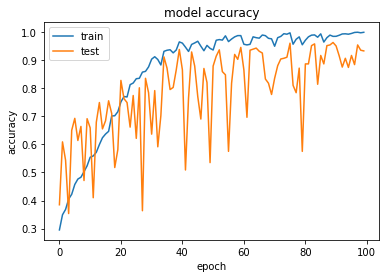

In [17]:
import matplotlib.pyplot as plt
import numpy

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

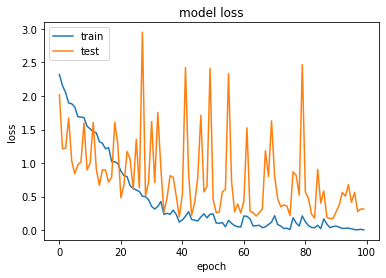

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    #X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model